In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## **1. importing the dataset**

In [4]:
df = pd.read_csv('drive/MyDrive/Ad Click Data.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0.0,Tunisia,3/27/2016 0:53,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1.0,Nauru,4/4/2016 1:39,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0.0,San Marino,3/13/2016 20:35,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1.0,Italy,1/10/2016 2:31,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0.0,Iceland,6/3/2016 3:36,0


In [5]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,987.000000,1000.000000,987.000000,989.000000,997.000000,1000.00000
mean,64.929524,36.009000,54980.667234,179.863620,0.480441,0.50000
std,15.844699,8.785562,13439.998510,43.870142,0.499868,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.270000,29.000000,46947.570000,138.710000,0.000000,0.00000
50%,68.110000,35.000000,57009.760000,182.650000,0.000000,0.50000
75%,78.460000,42.000000,65479.350000,218.790000,1.000000,1.00000
max,91.430000,61.000000,79484.800000,267.010000,1.000000,1.00000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      999 non-null    object 
 6   Male                      997 non-null    float64
 7   Country                   991 non-null    object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 78.2+ KB


In [7]:
df.isnull().sum()

Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Ad Topic Line                0
City                         1
Male                         3
Country                      9
Timestamp                    0
Clicked on Ad                0
dtype: int64

## **2. handling the missing values**

#### (a) correlation heatmap

<ipython-input-8-69b8d35b00e9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


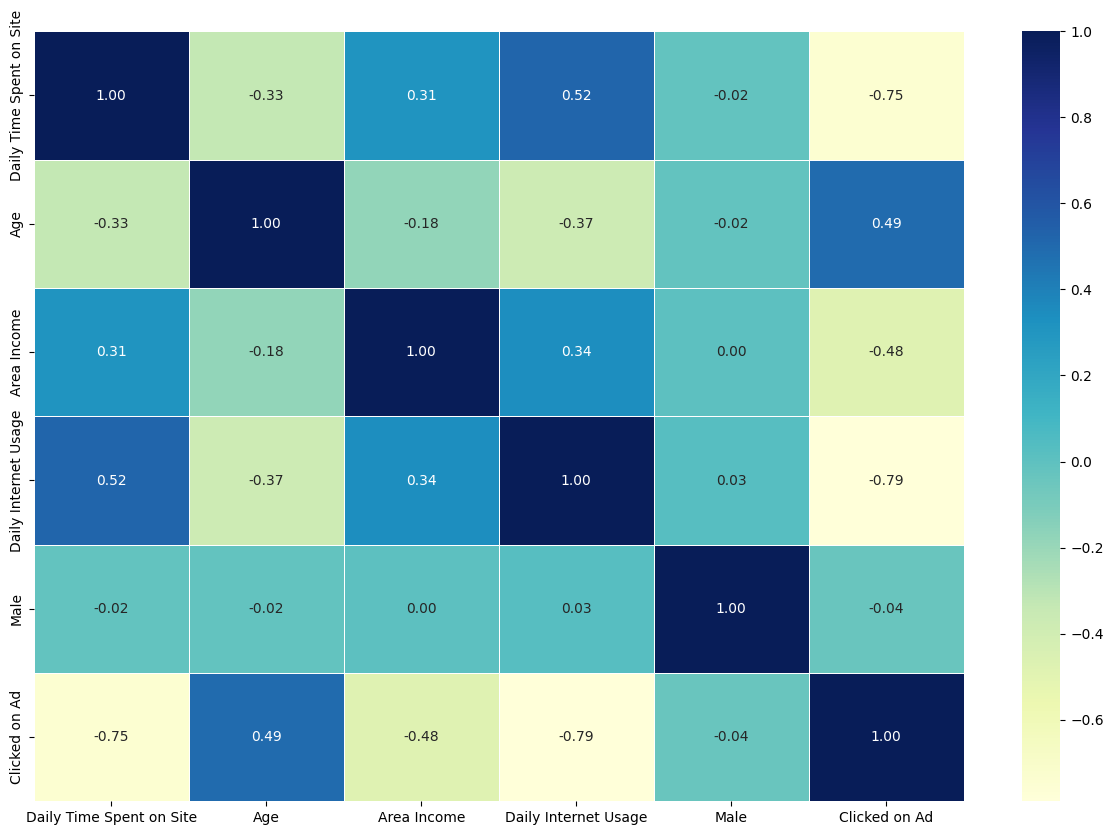

In [8]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");

#### (b) daily time spent on site
* data is MCAR
* this column has a very high correlation with the columns daily internet usage and clicked on ad columns
* hence filling these values by multivariate analysis using iterative imputer

In [12]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imp = IterativeImputer()

cols = ['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']
result = iter_imp.fit_transform(df[cols])

df['Daily Time Spent on Site'] = result[:, cols.index('Daily Time Spent on Site')]

#### (c) daily internet usage

In [17]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imp = IterativeImputer()

cols = ['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad']
result = iter_imp.fit_transform(df[cols])

df['Daily Internet Usage'] = result[:, cols.index('Daily Internet Usage')]

#### (d) male, city and country
* values are MCAR
* the ratio of males to female is approximately 50:50
* hence, deleted

In [42]:
df.dropna(subset=['City'], inplace=True)
df.dropna(subset=['Country'], inplace=True)
df.dropna(subset=['Male'], inplace=True)

In [43]:
df.isnull().sum()

Daily Time Spent on Site     0
Age                          0
Area Income                 12
Daily Internet Usage         0
Ad Topic Line                0
City                         0
Male                         0
Country                      0
Timestamp                    0
Clicked on Ad                0
dtype: int64

#### (e) area income

In [44]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
iter_imp = IterativeImputer()

cols = ['Daily Time Spent on Site','Daily Internet Usage','Clicked on Ad','Area Income']
result = iter_imp.fit_transform(df[cols])

df['Area Income'] = result[:, cols.index('Area Income')]

In [45]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

## **3. visualizations**

#### (a) what age group do most of the site users belong to?

<ipython-input-57-647afe2c6aaa>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))


<Axes: xlabel='Age', ylabel='Density'>

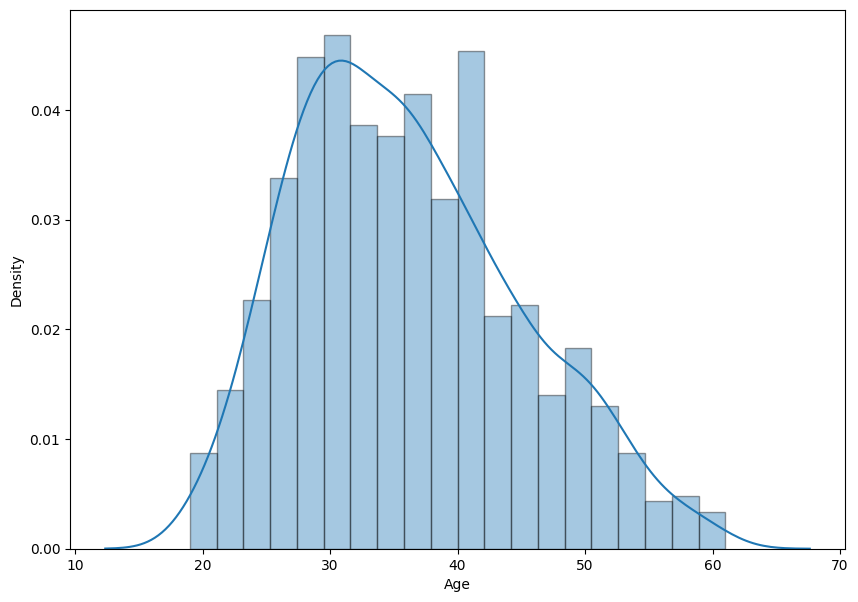

In [57]:
plt.figure(figsize=(10,7))
sns.distplot(df['Age'], bins = 20, kde=True, hist_kws=dict(edgecolor="k", linewidth=1))

* as seen in the above graph, most frequent users of the internet are in the age ranging from the late 20's to early 40's.
* the reason behind this might be the educational and professional requirements that this age group has.
* the average age of a person visiting the site is 36 years. The age range of users varies from 19 being the youngest to 61 being the oldest user.
* thus it can be concluded that the site is targetting **adult users**.

#### (b) what is the income of people visiting this website?

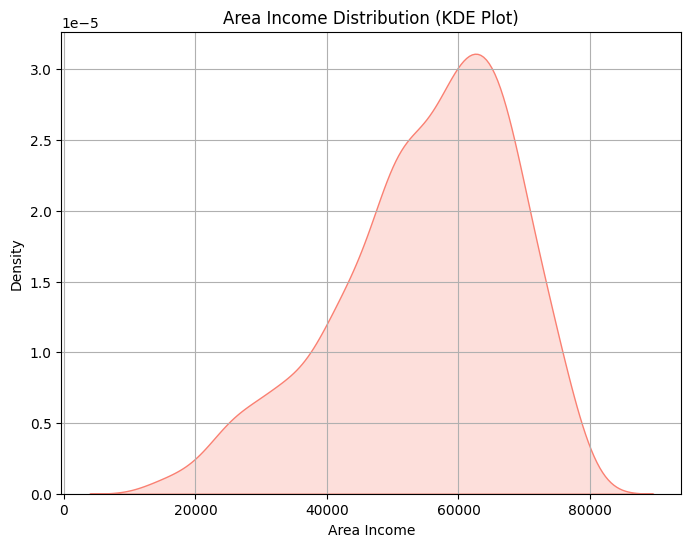

In [65]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Area Income'], fill=True, color='salmon')
plt.title('Area Income Distribution (KDE Plot)')
plt.xlabel('Area Income')
plt.ylabel('Density')
plt.grid(True)
plt.show()

* from th above graph, it is clear that people having income ranging between 20k - 80k visit the website.
* this range of income is very huge, hence we can conclude that people from different social classes visit this website.
* thus, it can finally be concluded that this website might be a very **popular website**.

#### (c) what is the amount of time spent on site out of the daily time spent on the internet

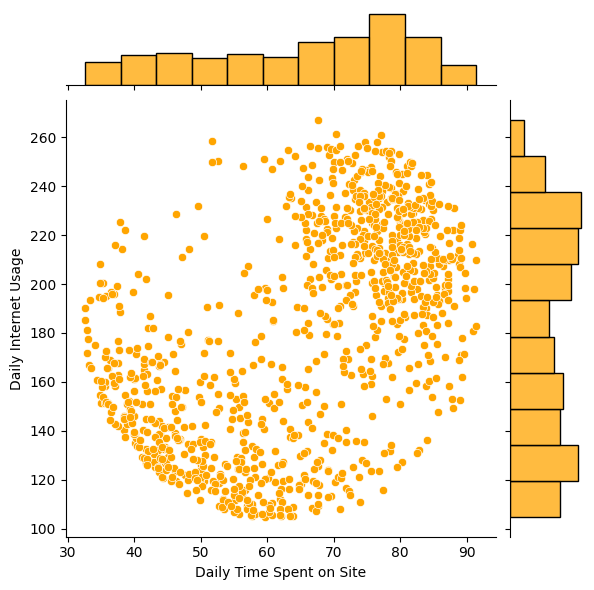

In [61]:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df, kind='scatter', color='orange')
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.show()

* even most of the users that don't access the internet very much, access the site anywhere from 40-65% of their total time spent on the internet.
* users spend anywhere from 32.6 mins to 91.43 mins on the site in a single session.
* thus it can be concluded that this site is for **entertainment purposes**

## **4. model**  

#### (a) feature selection

In [79]:
len(df['Ad Topic Line'].unique())

987

In [80]:
len(df['City'].unique())

957

In [81]:
len(df['Country'].unique())

236

In [84]:
df['Country'].value_counts()[:20]

France            9
Czech Republic    9
Micronesia        8
Afghanistan       8
Turkey            8
Liberia           8
Australia         8
Cyprus            8
Peru              8
Greece            8
South Africa      8
Western Sahara    7
Luxembourg        7
Taiwan            7
Senegal           7
Cambodia          7
Eritrea           7
Albania           7
Ethiopia          7
Fiji              7
Name: Country, dtype: int64

* the columns: Ad Topic Line, City and Country have too many unique values in the them, which will create a difficulty for the model to establish valueable relationships to predict the target variable.
* although the country column does not have that many unique values compared to the others, it lacks a country which is paticularly dominant over the other countries in that column.
* hence these columns will be dropped.

In [85]:
df = df.drop(['Ad Topic Line', 'City', 'Country'], axis=1)

* converting timestamp into the columns Month, Day of month, Day of week and Hour

In [86]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['Day of month'] = df['Timestamp'].dt.day
df['Day of week'] = df['Timestamp'].dt.dayofweek
df['Hour'] = df['Timestamp'].dt.hour
df = df.drop(['Timestamp'], axis=1)

#### (b) fitting a regression model on the data

In [100]:
np.random.seed(42)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter = 500)

X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model.fit(X_train, y_train)
y_preds = model.predict(X_test)
model.score(X_test,y_test)

0.898989898989899

## **5. evaluation**

#### (a) confusion matrix, precision and recall

In [101]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_preds, y_test)

array([[99, 14],
       [ 6, 79]])

* the total number of accurate predictions `(TN + TP)` are 99 + 79 = 178 out of 198
* the total number of inaccurate predictions `(FP + FN)` are 6 + 14 = 20 out of 198

In [105]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
print(precision_score(y_preds, y_test))
print(recall_score(y_preds, y_test))

0.8494623655913979
0.9294117647058824
